In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

Shape of X is:  (26, 2)


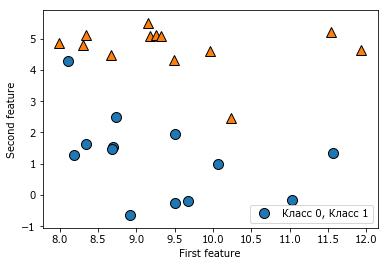

In [2]:
#Генерируем набор данных бинрных признаков forge
X, y= mglearn.datasets.make_forge()
#Строим график для набора
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0, Класс 1"], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('Shape of X is: ', X.shape)

Text(0,0.5,'Target variable')

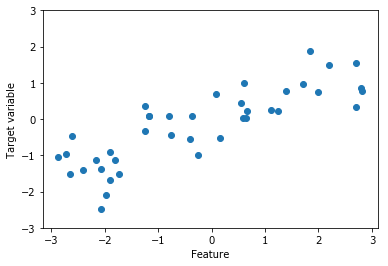

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target variable')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Cancer keys: ', cancer.keys())
print(cancer['DESCR'])

Cancer keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fiel

In [5]:
print(cancer['data'].shape)
print('Sample amount of each class: ', dict(zip(cancer.target_names, np.bincount(cancer.target))))

(569, 30)
Sample amount of each class:  {'malignant': 212, 'benign': 357}


In [6]:
print('Feature names: ', cancer.feature_names)

Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Shape of boston.data is: ', boston.data.shape)
print(boston['DESCR'])

Shape of boston.data is:  (506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO

In [8]:
X, y = mglearn.datasets.load_extended_boston()
print('Extended shape of X_data:', X.shape)

Extended shape of X_data: (506, 104)


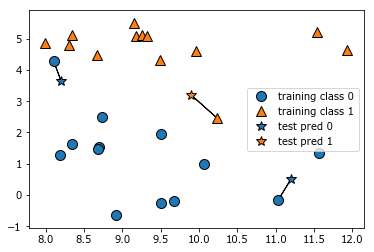

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

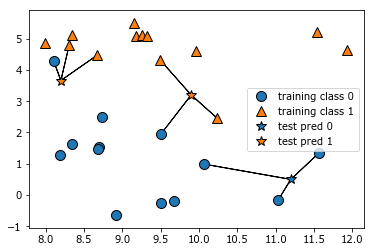

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
print('Predictions on test part: ', clf.predict(X_test))
print('Correct answers on test:  ', y_test)

Predictions on test part:  [1 0 1 0 1 0 0]
Correct answers on test:   [1 0 1 0 1 1 0]


In [19]:
print('Accuracy is: ', '%.2f' % clf.score(X_test, y_test))

Accuracy is:  0.86


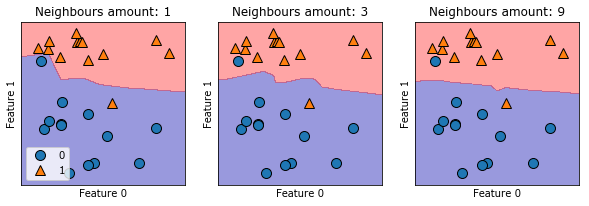

In [23]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('Neighbours amount: {}'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3)   
    

Text(0,0.5,'Neighbor amount')

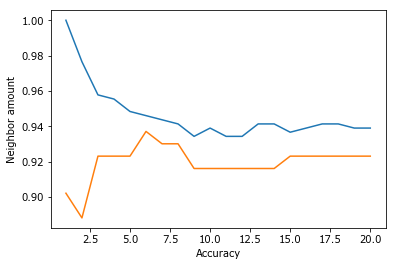

In [32]:
#Now are working with cancer
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#Try neighbours from 1 to 10
for n_neighbors in range(1,21):
    #Build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #Check accuracy on train and test sets
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(range(1,21), training_accuracy, label='Accuracy on train set')
plt.plot(range(1,21), test_accuracy, label='Accuracy on test set')
plt.xlabel('Accuracy')
plt.ylabel('Neighbor amount')

Text(0,0.5,'Target variable')

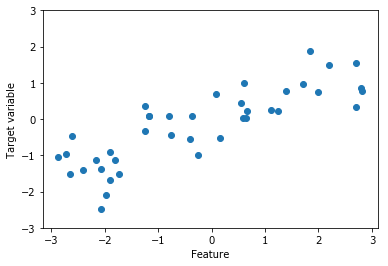

In [33]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target variable')

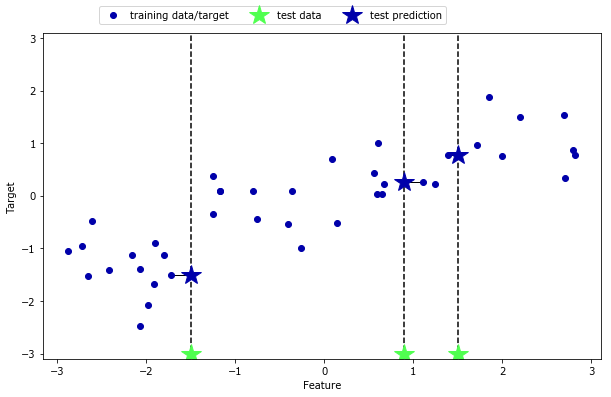

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

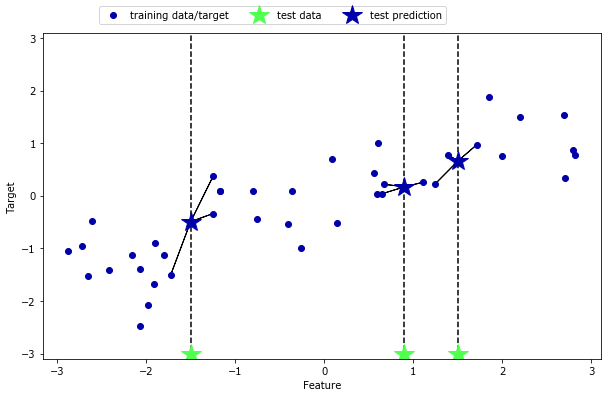

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

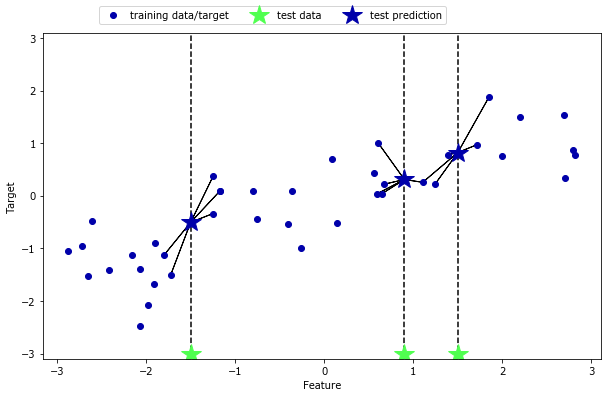

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print('Prediction for test set : ', reg.predict(X_test))
print('Correct answers test set: ', y_test)
print('Accuracy is: ', '%.2f' % reg.score(X_test, y_test))

Prediction for test set :  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Correct answers test set:  [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
Accuracy is:  0.83


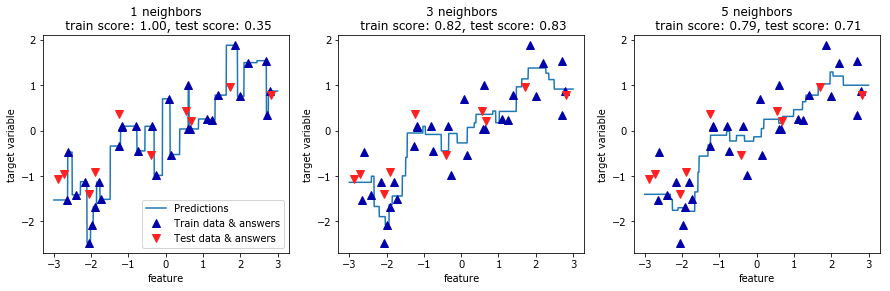

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 5], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        '{} neighbors\n train score: {:.2f}, test score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target variable')
    axes[0].legend({'Predictions', 'Train data & answers', 'Test data & answers'}, loc='best')
        
        